### Analizando resultados parámetros por pareja

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set()

df_dyads = pd.read_csv('../Data/humans_only_absent.csv')
df_fitted = pd.read_csv('../Data/Dyads/dyads-fitted.csv')
#df_classification = pd.read_csv('../Data/classificationDL.csv')

In [113]:
complemento = {'RS':'RS',
               'ALL':'NOTHING', 'NOTHING':'ALL',
               'TOP':'BOTTOM', 'BOTTOM': 'TOP',
               'LEFT':'RIGHT', 'RIGHT':'LEFT',
               'IN':'OUT', 'OUT':'IN'
              }
ordenar = {'OUT-IN': 'IN-OUT', 'RIGHT-LEFT':'LEFT-RIGHT', 'BOTTOM-TOP':'TOP-BOTTOM', 'NOTHING-ALL':'ALL-NOTHING'}
dyad_dl = {}
difficult_dyads = []
for dyad, Grp in df_dyads.groupby('Dyad'):
    codes = []
    inicial = True
    dlindx = Grp['DLIndex'].mean()
    for player, grp in Grp.groupby('Player'):
        df = grp.groupby('Category')['DLIndex'].mean().reset_index()
        #print(df)
        m = df['DLIndex'].max()
        codes.append(df[df['DLIndex']==m].Category.tolist()[0])
    if codes[0] == complemento[codes[1]]:
        code = codes[0] + "-" + codes[1]
        code = ordenar[code] if code in ordenar.keys() else code
        dyad_dl[dyad] = code
    else:
        difficult_dyads.append(dyad)
    # print("****\nDyad", dyad, "with code", code, "and DLindex", dlindx)

print(len(dyad_dl), dyad_dl)

31 {'140-615': 'IN-OUT', '142-263': 'RS-RS', '151-962': 'RS-RS', '216-713': 'RS-RS', '251-716': 'TOP-BOTTOM', '261-970': 'ALL-NOTHING', '277-491': 'TOP-BOTTOM', '352-425': 'ALL-NOTHING', '354-344': 'TOP-BOTTOM', '356-137': 'ALL-NOTHING', '416-710': 'ALL-NOTHING', '419-723': 'LEFT-RIGHT', '435-261': 'LEFT-RIGHT', '462-640': 'ALL-NOTHING', '469-569': 'LEFT-RIGHT', '475-186': 'RS-RS', '483-710': 'RS-RS', '487-811': 'ALL-NOTHING', '538-623': 'LEFT-RIGHT', '546-111': 'TOP-BOTTOM', '598-684': 'RS-RS', '618-522': 'RS-RS', '637-838': 'LEFT-RIGHT', '648-175': 'LEFT-RIGHT', '687-660': 'RS-RS', '768-541': 'TOP-BOTTOM', '825-534': 'TOP-BOTTOM', '880-349': 'RS-RS', '938-219': 'ALL-NOTHING', '947-704': 'LEFT-RIGHT', '948-444': 'LEFT-RIGHT'}


In [141]:
difficult_dyads1 = []
for dyad, Grp in df_dyads.groupby('Dyad'):
    codes = []
    if dyad in difficult_dyads:
        dlindx = Grp['DLIndex'].mean()
        #print("Dyad", dyad, "DLindex", dlindx)
        for player, grp in Grp.groupby('Player'):
            df = grp[grp['Round']>40]
            df = df['Category'].value_counts().reset_index()
            df.columns = ['Category', 'Freq']
            #print(df)
            m = df['Freq'].max()
            #print(m)
            aux = df[df['Freq']==m]
            codes.append(aux['Category'].unique().tolist()[0])
        if codes[0] == complemento[codes[1]]:
            code = codes[0] + "-" + codes[1]
            code = ordenar[code] if code in ordenar.keys() else code
            dyad_dl[dyad] = code
        else:
            difficult_dyads1.append(dyad)

print(len(dyad_dl), dyad_dl)             

42 {'140-615': 'IN-OUT', '142-263': 'RS-RS', '151-962': 'RS-RS', '216-713': 'RS-RS', '251-716': 'TOP-BOTTOM', '261-970': 'ALL-NOTHING', '277-491': 'TOP-BOTTOM', '352-425': 'ALL-NOTHING', '354-344': 'TOP-BOTTOM', '356-137': 'ALL-NOTHING', '416-710': 'ALL-NOTHING', '419-723': 'LEFT-RIGHT', '435-261': 'LEFT-RIGHT', '462-640': 'ALL-NOTHING', '469-569': 'LEFT-RIGHT', '475-186': 'RS-RS', '483-710': 'RS-RS', '487-811': 'ALL-NOTHING', '538-623': 'LEFT-RIGHT', '546-111': 'TOP-BOTTOM', '598-684': 'RS-RS', '618-522': 'RS-RS', '637-838': 'LEFT-RIGHT', '648-175': 'LEFT-RIGHT', '687-660': 'RS-RS', '768-541': 'TOP-BOTTOM', '825-534': 'TOP-BOTTOM', '880-349': 'RS-RS', '938-219': 'ALL-NOTHING', '947-704': 'LEFT-RIGHT', '948-444': 'LEFT-RIGHT', '152-727': 'RS-RS', '269-653': 'RS-RS', '303-869': 'RS-RS', '331-863': 'TOP-BOTTOM', '359-904': 'RS-RS', '379-897': 'RS-RS', '444-475': 'RS-RS', '505-833': 'RS-RS', '588-564': 'RS-RS', '636-625': 'RS-RS', '711-459': 'RS-RS'}


In [142]:
print(difficult_dyads1)

['313-199', '590-286', '656-979']


In [143]:
dyad_dl['313-199'] = 'NOTHING-NOTHING'
dyad_dl['590-286'] = 'MIX'
dyad_dl['656-979'] = 'LEFT-RIGHT'

In [145]:
df_dyads['DL'] = df_dyads['Dyad'].map(dyad_dl)

In [144]:
df_dyads = df_dyads.groupby('Dyad')['DLIndex'].mean().reset_index()
df_dyads.head()

,Dyad,DLIndex
0,140-615,0.707031
1,142-263,0.495312
2,151-962,0.490885
3,152-727,0.638021
4,216-713,0.079687


In [150]:
df = df_dyads.groupby('Dyad')['DLIndex'].mean().reset_index()
df.head(2)

,Dyad,DLIndex
0,140-615,0.707031
1,142-263,0.495312


In [151]:
dict1 = {k: v for k, v in zip(df['Dyad'], df['DLIndex'])}
df_fitted['DLindex'] = df_fitted['Dyad'].map(dict1)
df_fitted['DL'] = df_fitted['Dyad'].map(dyad_dl)
df_fitted.sort_values(by='DLindex', ascending=False, inplace=True)
df_fitted.head(2)

,Dyad,Model,wA,wN,wL,wI,alpha,beta,gamma,delta,epsilon,zeta,dev,DLindex,DL
134,948-444,FRA,8.186729e-12,2.159315e-05,0.000100,0.000007,999.99885,999.999981,11.152907,1.456023,999.953862,0.830747,2.800091,1.0,LEFT-RIGHT
133,948-444,WSLS,8.381578e-05,7.267938e-09,0.125182,0.000083,999.99927,999.999969,23.330981,0.000000,0.000000,0.000000,5.600291,1.0,LEFT-RIGHT


In [152]:
df_fitted[df_fitted['Model']=='WSLS'].sort_values(by='Dyad')

,Dyad,Model,wA,wN,wL,wI,alpha,beta,gamma,delta,epsilon,zeta,dev,DLindex,DL
1,140-615,WSLS,4.157314e-02,4.166922e-02,2.956391e-08,6.363226e-02,2.432808e+01,999.053268,1.228976e+01,0.0,0.0,0.0,23.346254,0.707031,IN-OUT
4,142-263,WSLS,1.416396e-06,2.169374e-06,1.653377e-08,6.275624e-06,3.037738e-03,999.001176,5.520105e+00,0.0,0.0,0.0,0.052784,0.495312,RS-RS
7,151-962,WSLS,1.075755e-05,7.739011e-06,7.937218e-06,6.429288e-06,9.998006e+02,999.999678,3.199680e+01,0.0,0.0,0.0,0.041588,0.490885,RS-RS
10,152-727,WSLS,1.428353e-01,2.198271e-02,2.583739e-12,1.275531e-07,7.148213e-01,999.999811,2.604422e+01,0.0,0.0,0.0,23.865966,0.638021,RS-RS
13,216-713,WSLS,2.500000e-01,1.000051e-04,9.999955e-05,1.000066e-04,9.999997e+02,999.000010,1.748060e-01,0.0,0.0,0.0,50.931906,0.079687,RS-RS
16,251-716,WSLS,8.327465e-02,1.889104e-06,9.122104e-08,1.021954e-07,9.986772e+02,999.999695,3.183637e+01,0.0,0.0,0.0,3.450429,0.836648,TOP-BOTTOM
19,261-970,WSLS,1.673116e-01,1.435845e-01,2.886094e-08,7.566170e-14,2.851517e+00,999.000000,0.000000e+00,0.0,0.0,0.0,36.590280,0.657670,ALL-NOTHING
22,269-653,WSLS,1.778133e-01,6.667820e-02,5.186783e-11,2.470865e-07,9.999073e+02,999.000028,1.828934e+01,0.0,0.0,0.0,30.809018,0.569602,RS-RS
25,277-491,WSLS,5.750616e-06,1.038700e-05,9.425045e-08,3.160073e-05,9.996977e+02,999.215727,2.397871e+01,0.0,0.0,0.0,0.001600,0.933894,TOP-BOTTOM
28,303-869,WSLS,6.248005e-02,6.938894e-17,0.000000e+00,0.000000e+00,1.811773e+00,1000.000000,0.000000e+00,0.0,0.0,0.0,13.238651,0.859375,RS-RS


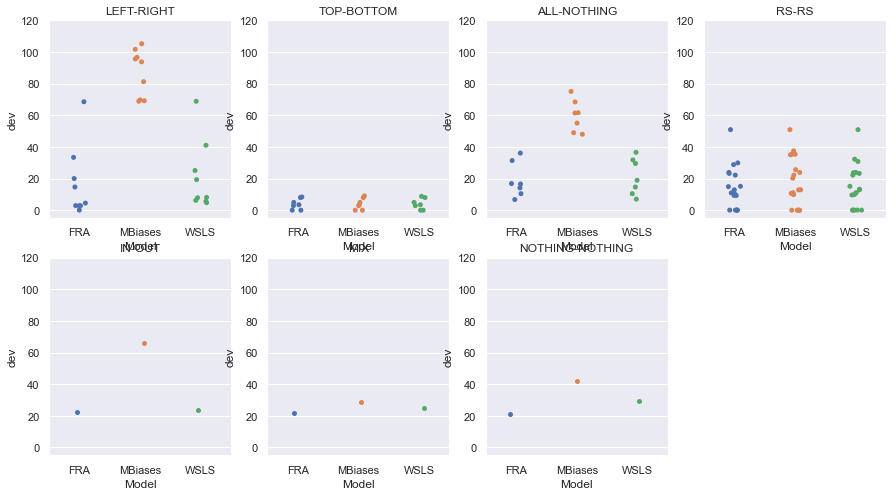

In [162]:
fig = plt.figure(figsize=(15,8))
split = df_fitted['DL'].unique()
for i, sp in enumerate(split):
    df = df_fitted[df_fitted['DL']==sp].sort_values(by='Model')
    plt.subplot(2,4,i+1)
    ax = sns.stripplot(x='Model', y='dev', data=df)
    ax.set_ylim([-5,120])
    plt.xlabel('Model')
    plt.ylabel('dev')
    plt.title(sp)
plt.show()

In [163]:
df_fitted.groupby('Model')['dev'].sum()

Model
FRA         647.561479
MBiases    1709.624831
WSLS        731.054501
Name: dev, dtype: float64

In [164]:
dic = {}
for dyad, grp in df_fitted.groupby('Dyad'):
    Maxi = grp['dev'].max(),
    Model = grp[grp['dev'] == Maxi]['Model'].tolist()[0]
    dic[dyad] = Model

df_fitted['Modelado'] = df_fitted['Dyad'].map(dic)
df_fitted.head()

,Dyad,Model,wA,wN,wL,wI,alpha,beta,gamma,delta,epsilon,zeta,dev,DLindex,DL,Modelado
134,948-444,FRA,8.186729e-12,2.159315e-05,0.000100,7.360080e-06,999.998850,999.999981,11.152907,1.456023,999.953862,0.830747,2.800091,1.000000,LEFT-RIGHT,MBiases
133,948-444,WSLS,8.381578e-05,7.267938e-09,0.125182,8.298721e-05,999.999270,999.999969,23.330981,0.000000,0.000000,0.000000,5.600291,1.000000,LEFT-RIGHT,MBiases
132,948-444,MBiases,0.000000e+00,0.000000e+00,0.239129,3.568461e-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.223818,1.000000,LEFT-RIGHT,MBiases
86,546-111,FRA,1.997687e-01,2.053552e-01,0.168591,1.920470e-01,923.952442,999.643951,14.126669,32.069998,999.668571,0.801263,0.000000,0.995117,TOP-BOTTOM,FRA
85,546-111,WSLS,2.223940e-01,1.330441e-01,0.231313,9.418812e-02,302.568652,999.943608,24.976592,0.000000,0.000000,0.000000,0.000000,0.995117,TOP-BOTTOM,FRA


In [165]:
df = df_fitted[df_fitted['Modelado']=='FRA']
df = df[df['Model']==df['Modelado']]
print(df.shape)
df.head(7)

(6, 16)


,Dyad,Model,wA,wN,wL,wI,alpha,beta,gamma,delta,epsilon,zeta,dev,DLindex,DL,Modelado
86,546-111,FRA,1.997687e-01,2.053552e-01,1.685915e-01,1.920470e-01,923.952442,999.643951,14.126669,3.207000e+01,999.668571,0.801263,0.000000,0.995117,TOP-BOTTOM,FRA
26,277-491,FRA,5.866620e-05,1.887821e-06,1.805617e-08,7.824451e-07,0.000032,999.654583,0.199356,7.229312e-07,999.997143,0.998271,0.001600,0.933894,TOP-BOTTOM,FRA
98,618-522,FRA,3.610966e-08,4.122793e-05,1.329589e-06,4.927841e-08,72.603430,999.999770,3.290345,9.999966e+02,999.999992,1.000000,0.041588,0.496875,RS-RS,FRA
5,142-263,FRA,6.623892e-07,7.475312e-05,1.440019e-06,9.886768e-07,997.799447,999.995467,32.000000,1.373165e-02,999.005695,1.000000,0.052784,0.495312,RS-RS,FRA
116,711-459,FRA,1.852013e-02,7.291331e-11,6.776271e-07,9.259030e-03,853.972594,999.228454,30.988417,1.241426e-07,999.000052,0.999916,10.660606,0.453125,RS-RS,FRA
14,216-713,FRA,2.500000e-01,1.000104e-04,1.000088e-04,1.000006e-04,999.996763,999.170865,31.999997,0.000000e+00,999.000029,0.500037,50.931906,0.079687,RS-RS,FRA


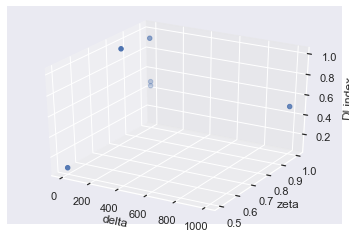

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = list(df['delta'])
ys = list(df['zeta'])
zs = list(df['DLindex'])
ax.scatter(xs, ys, zs)

ax.set_xlabel('delta')
ax.set_ylabel('zeta')
ax.set_zlabel('DLindex')

plt.show()

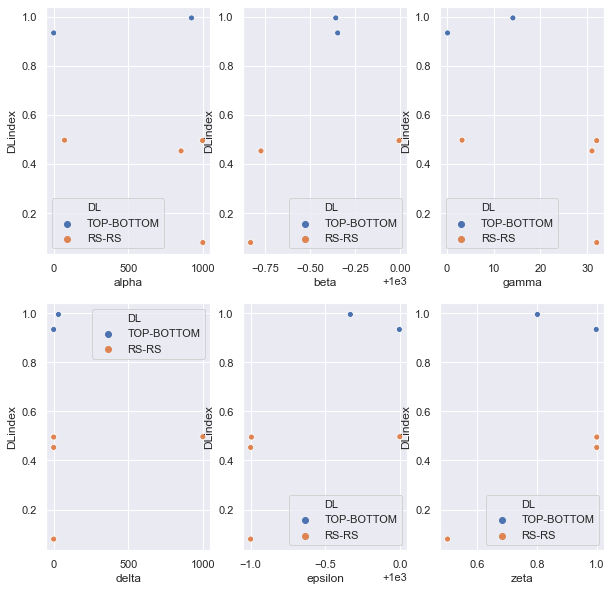

In [167]:
fig, ax = plt.subplots(figsize=(10,10))
columnas = df.columns.tolist()[6:12]
for i, col in enumerate(columnas):
    plt.subplot(2,3,i+1)
    ax=sns.scatterplot(df[col], df['DLindex'], hue=df['DL'])